In [15]:
# Import the required libraries and dependencies
import os
import datetime
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import plotly.express as px
from plotly import graph_objects
%matplotlib inline

In [2]:
# uses the load_dotenv function to grab our API key in the .env file
load_dotenv()

True

In [3]:
# Sets the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Checks the values were imported correctly by evaluating the type of each

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Creates the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


str

str

In [4]:
# Grabs the data from NBI for the selected stocks
nbi_selected_stock = ["JAZZ","KOD","AFMD","XENE","GILD"]

In [5]:
# Set timeframe to 1D 
timeframe = "1D"

In [6]:
# Set the start and end dates for 5 years with two data frames to cover the entire time period
start = pd.Timestamp("2016-07-24", tz="America/New_York").isoformat()
end = pd.Timestamp("2017-07-24", tz="America/New_York").isoformat()
five_year_df_one = alpaca.get_barset(
    nbi_selected_stock,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

start = pd.Timestamp("2017-07-24", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-07-24", tz="America/New_York").isoformat()
five_year_df_two = alpaca.get_barset(
    nbi_selected_stock,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

In [7]:
# Set new variable to combine both the dataframes to show the data for the 5 year time frame
combined_five_year_df=five_year_df_one.append([five_year_df_two])



In [8]:
# Display both the first and last five rows of the DataFrame
display(combined_five_year_df.head())
display(combined_five_year_df.tail())

AFMD                                  GILD  \
                           open    high    low close    volume   open   
time                                                                    
2016-07-25 04:00:00+00:00  2.83  2.9200  2.650  2.65  112363.0  86.57   
2016-07-26 04:00:00+00:00  2.66  2.7650  2.600  2.63   86811.0  84.09   
2016-07-27 04:00:00+00:00  2.65  2.7200  2.650  2.68   93821.0  81.34   
2016-07-28 04:00:00+00:00  2.70  2.7799  2.650  2.68   47801.0  81.92   
2016-07-29 04:00:00+00:00  2.70  2.7700  2.601  2.62   52909.0  80.59   

                                                              ...  KOD       \
                              high    low  close      volume  ... open high   
time                                                          ...             
2016-07-25 04:00:00+00:00  88.8500  86.28  88.59  11413701.0  ...  NaN  NaN   
2016-07-26 04:00:00+00:00  84.1499  80.51  80.98  41554711.0  ...  NaN  NaN   
2016-07-27 04:00:00+00:00  81.9800  81.06  81.81  11959106.0  ...  NaN  NaN   
2016-07-28 04:00:00+00:00  81.9800  80.62  81.23  10898159.0  ...  NaN  NaN   
2016-07-29 04:00:00+00:00  80.8400  79.37  79.46  16161315.0  ...  NaN  NaN   

                                              XENE                        \
                          low close volume    open    high     low close   
time                                                                       
2016-07-25 04:00:00+00:00 NaN   NaN    NaN  7.2501  7.4699  7.0601  7.10   
2016-07-26 04:00:00+00:00 NaN   NaN    NaN  7.2000  7.4400  7.1900  7.39   
2016-07-27 04:00:00+00:00 NaN   NaN    NaN  7.2501  7.4899  7.2500  7.36   
2016-07-28 04:00:00+00:00 NaN   NaN    NaN  7.3001  7.4600  7.3000  7.33   
2016-07-29 04:00:00+00:00 NaN   NaN    NaN  7.3700  7.7900  7.3700  7.60   

                                    
                            volume  
time                                
2016-07-25 04:00:00+00:00  19266.0  
2016-07-26 04:00:00+00:00   8203.0  
2016-07-27 04:00:00+00:00   5688.0  
2016-07-28 04:00:00+00:00   4329.0  
2016-07-29 04:00:00+00:00   6342.0  

[5 rows x 25 columns]

AFMD                                GILD          \
                           open  high   low close     volume   open    high   
time                                                                          
2021-07-19 00:00:00-04:00  6.38  6.57  6.32  6.45   808998.0  68.63  69.070   
2021-07-20 00:00:00-04:00  6.41  6.61  6.31  6.61   636154.0  68.42  69.770   
2021-07-21 00:00:00-04:00  6.64  6.85  6.45  6.84   627102.0  68.95  69.020   
2021-07-22 00:00:00-04:00  6.81  6.84  6.60  6.63   483753.0  68.04  68.805   
2021-07-23 00:00:00-04:00  6.71  7.03  6.62  6.92  1005507.0  68.90  69.340   

                                                     ...    KOD                \
                              low  close     volume  ...   open   high    low   
time                                                 ...                        
2021-07-19 00:00:00-04:00  67.665  68.24  4990435.0  ...  86.41  86.41  83.54   
2021-07-20 00:00:00-04:00  68.270  69.16  6314111.0  ...  85.60  87.59  84.67   
2021-07-21 00:00:00-04:00  68.010  68.40  4995875.0  ...  86.82  88.48  84.33   
2021-07-22 00:00:00-04:00  67.820  68.64  2451184.0  ...  87.89  88.60  84.57   
2021-07-23 00:00:00-04:00  68.640  69.01  2959427.0  ...  85.03  85.79  82.00   

                                             XENE                         \
                           close    volume   open   high      low  close   
time                                                                       
2021-07-19 00:00:00-04:00  84.90  255588.0  17.86  18.19  17.7000  17.92   
2021-07-20 00:00:00-04:00  86.26  293177.0  17.90  18.54  17.8900  18.49   
2021-07-21 00:00:00-04:00  88.10  217180.0  18.27  18.86  18.1115  18.46   
2021-07-22 00:00:00-04:00  84.78  186934.0  18.36  18.62  17.9956  18.10   
2021-07-23 00:00:00-04:00  85.78  152694.0  18.25  18.41  18.0746  18.19   

                                     
                             volume  
time                                 
2021-07-19 00:00:00-04:00   61804.0  
2021-07-20 00:00:00-04:00  260126.0  
2021-07-21 00:00:00-04:00   38704.0  
2021-07-22 00:00:00-04:00   49968.0  
2021-07-23 00:00:00-04:00   79139.0  

[5 rows x 25 columns]

In [9]:
# Displays the columns in the combined five year dataframe
combined_five_year_df.columns

MultiIndex([('AFMD',   'open'),
            ('AFMD',   'high'),
            ('AFMD',    'low'),
            ('AFMD',  'close'),
            ('AFMD', 'volume'),
            ('GILD',   'open'),
            ('GILD',   'high'),
            ('GILD',    'low'),
            ('GILD',  'close'),
            ('GILD', 'volume'),
            ('JAZZ',   'open'),
            ('JAZZ',   'high'),
            ('JAZZ',    'low'),
            ('JAZZ',  'close'),
            ('JAZZ', 'volume'),
            ( 'KOD',   'open'),
            ( 'KOD',   'high'),
            ( 'KOD',    'low'),
            ( 'KOD',  'close'),
            ( 'KOD', 'volume'),
            ('XENE',   'open'),
            ('XENE',   'high'),
            ('XENE',    'low'),
            ('XENE',  'close'),
            ('XENE', 'volume')],
           )

In [10]:
# Drop columns in the dataframe we don't need
dropped_columns = combined_five_year_df.drop(labels=["open","high","low","volume"], axis=1, level=1)

# Display both the first and last 10 rows of the DataFrame
display(dropped_columns.head(10))
display(dropped_columns.tail(10))

,AFMD,GILD,JAZZ,KOD,XENE
,close,close,close,close,close
time,,,,,
2016-07-25 04:00:00+00:00,2.6500,88.59,141.340,NaN,7.10
2016-07-26 04:00:00+00:00,2.6300,80.98,138.935,NaN,7.39
2016-07-27 04:00:00+00:00,2.6800,81.81,141.890,NaN,7.36
2016-07-28 04:00:00+00:00,2.6800,81.23,152.820,NaN,7.33
2016-07-29 04:00:00+00:00,2.6200,79.46,150.980,NaN,7.60
2016-08-01 04:00:00+00:00,2.7300,80.48,150.530,NaN,7.44
2016-08-02 04:00:00+00:00,2.8600,79.58,149.850,NaN,7.30
2016-08-03 04:00:00+00:00,3.1586,80.08,151.180,NaN,7.36


,AFMD,GILD,JAZZ,KOD,XENE
,close,close,close,close,close
time,,,,,
2021-07-12 00:00:00-04:00,7.00,68.04,184.8225,95.5299,18.440
2021-07-13 00:00:00-04:00,6.86,68.01,182.6400,93.3300,18.290
2021-07-14 00:00:00-04:00,6.61,67.93,180.6300,89.3300,17.650
2021-07-15 00:00:00-04:00,6.63,68.30,178.5500,87.6300,17.800
2021-07-16 00:00:00-04:00,6.54,68.62,175.4600,87.9500,18.045
2021-07-19 00:00:00-04:00,6.45,68.24,171.4800,84.9000,17.920
2021-07-20 00:00:00-04:00,6.61,69.16,175.4100,86.2600,18.490
2021-07-21 00:00:00-04:00,6.84,68.40,176.9500,88.1000,18.460


In [11]:
# Uses the percent change function to give percent change from the immediate row and the dropna function to get rid of rows with missing values.
nbi_sample_daily_returns = dropped_columns.pct_change().dropna()

# Looks at the first 10 rows of the new daily returns DataFrame
nbi_sample_daily_returns.head(10)

,AFMD,GILD,JAZZ,KOD,XENE
,close,close,close,close,close
time,,,,,
2018-10-05 00:00:00-04:00,0.002404,-0.004049,-0.009020,0.002405,-0.039069
2018-10-08 00:00:00-04:00,0.110312,0.002098,-0.003690,-0.037428,-0.057950
2018-10-09 00:00:00-04:00,-0.244060,0.001832,0.024444,-0.007976,-0.017456
2018-10-10 00:00:00-04:00,-0.028571,-0.023122,-0.024337,-0.025126,-0.065421
2018-10-11 00:00:00-04:00,-0.023529,-0.030356,-0.040087,0.020619,0.012000
2018-10-12 00:00:00-04:00,0.015060,0.015028,0.021810,0.016162,0.037549
2018-10-15 00:00:00-04:00,0.023739,-0.011273,-0.022793,-0.007952,-0.023810
2018-10-16 00:00:00-04:00,-0.002899,0.048509,0.017332,0.002004,0.086829


<AxesSubplot:title={'center':'NASDAQ Biotechnology Index Samples 2016 - 2021'}, xlabel='time'>

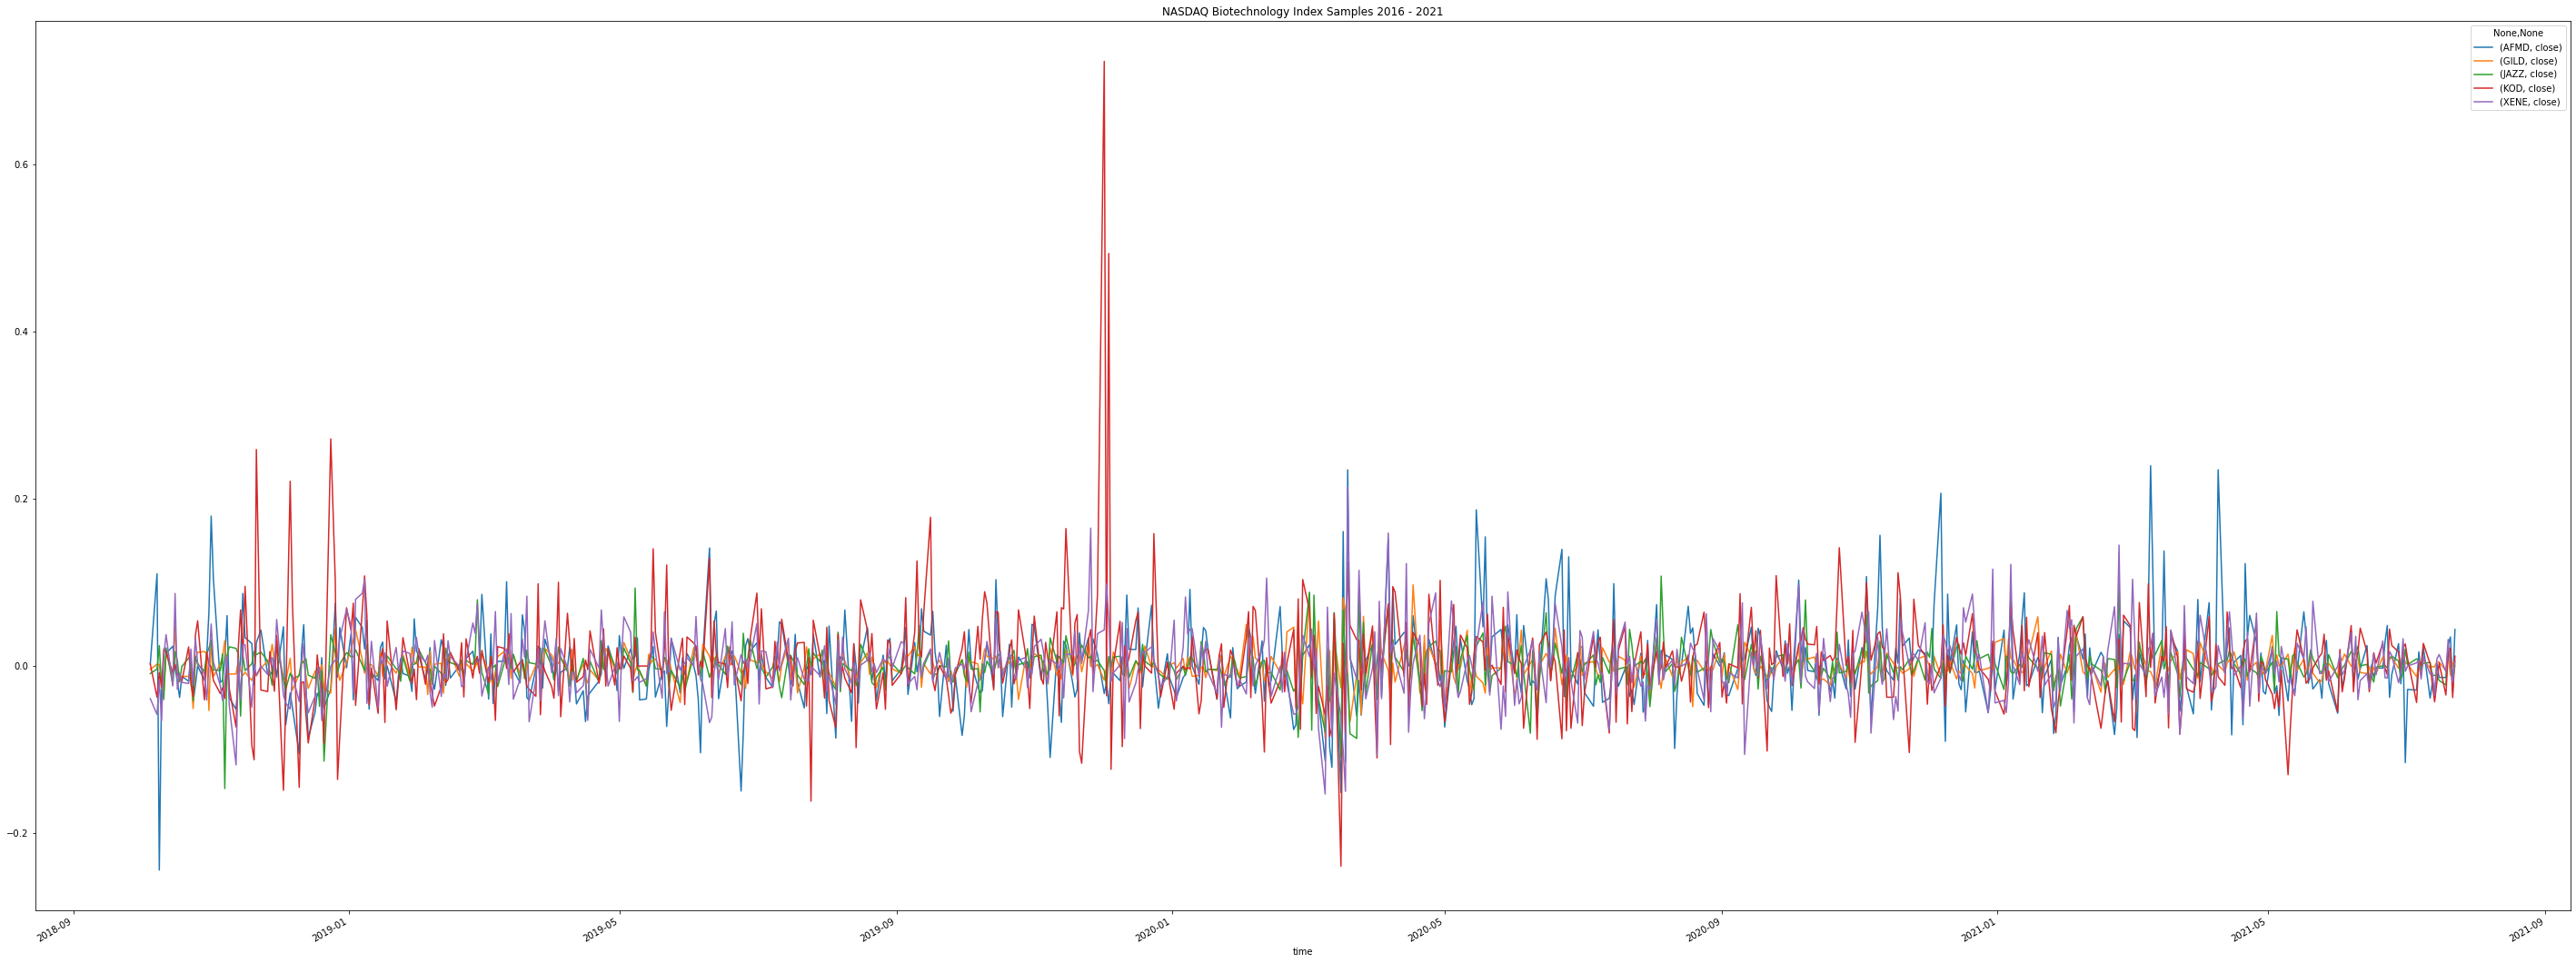

In [12]:
# This takes the daily returns DataFrame and creates a line plot
nbi_sample_daily_returns.plot(figsize=(50,20), title="NASDAQ Biotechnology Index Samples 2016 - 2021")

In [16]:
# Uses the cumulative product function on the daily returns DataFrame
nbi_sample_cumulative_returns = (1 + nbi_sample_daily_returns).cumprod()

# Looks at the last 10 rows of the data
nbi_sample_cumulative_returns.tail(10)

,AFMD,GILD,JAZZ,KOD,XENE
,close,close,close,close,close
time,,,,,
2021-07-12 00:00:00-04:00,1.682692,0.888715,1.126417,9.189986,1.532835
2021-07-13 00:00:00-04:00,1.649038,0.888323,1.113116,8.978355,1.520366
2021-07-14 00:00:00-04:00,1.588942,0.887278,1.100865,8.593555,1.467165
2021-07-15 00:00:00-04:00,1.593750,0.892111,1.088189,8.430014,1.479634
2021-07-16 00:00:00-04:00,1.572115,0.896290,1.069356,8.460798,1.500000
2021-07-19 00:00:00-04:00,1.550481,0.891327,1.045100,8.167388,1.489609
2021-07-20 00:00:00-04:00,1.588942,0.903344,1.069052,8.298220,1.536991
2021-07-21 00:00:00-04:00,1.644231,0.893417,1.078437,8.475228,1.534497


<AxesSubplot:title={'center':'Cumulative Returns of NASDAQ Biotechnology Index Samples 2016 - 2021'}, xlabel='time'>

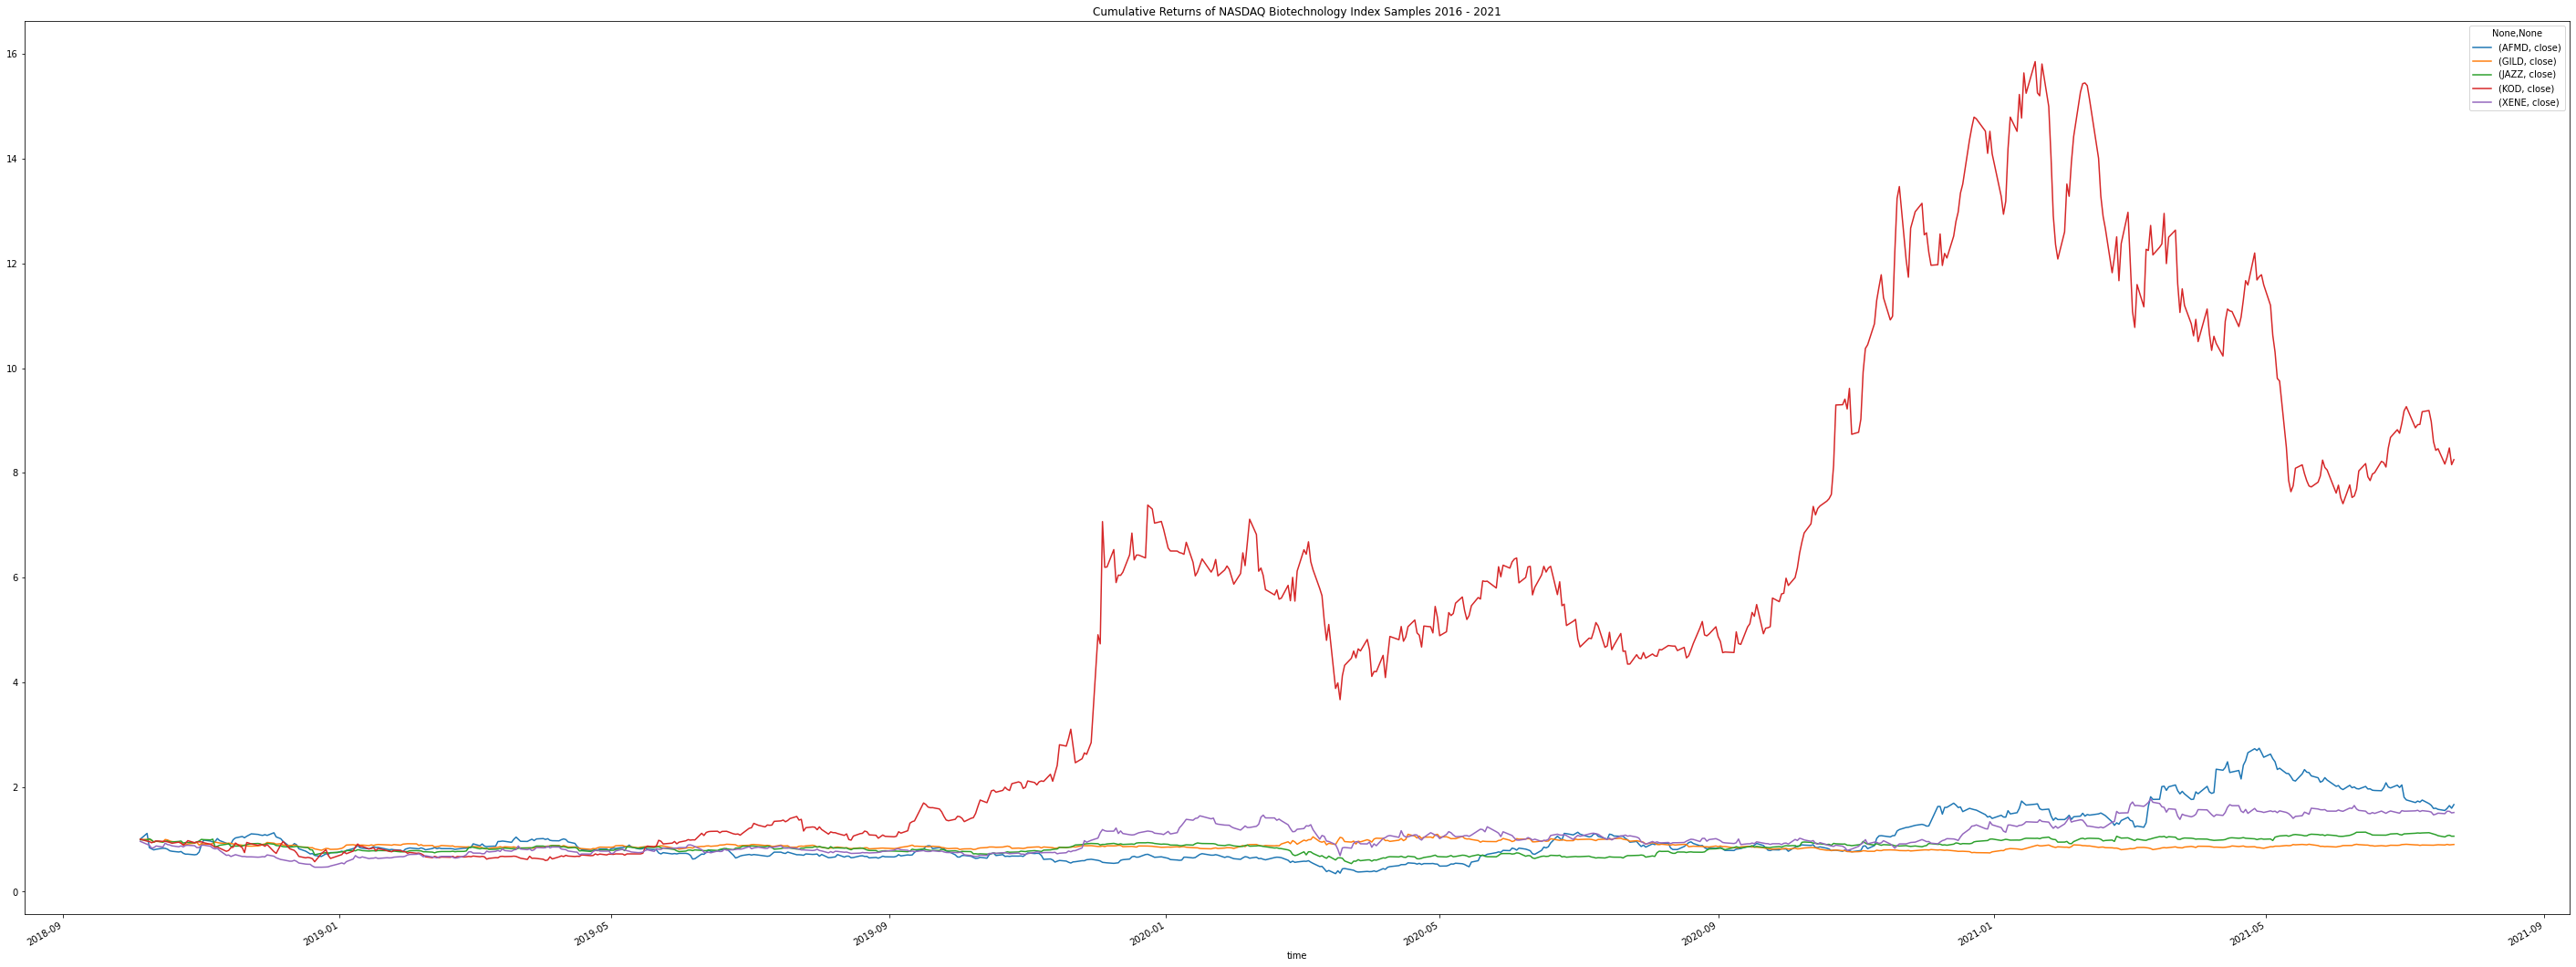

In [17]:
# This takes the cumulative returns DataFrame and creates a line plot
nbi_sample_cumulative_returns.plot(figsize=(50,20), title="Cumulative Returns of NASDAQ Biotechnology Index Samples 2016 - 2021")
